<a href="https://colab.research.google.com/github/SebasVasconez/sales-predictions/blob/main/sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CODING DOJO**
##Creado por: Sebastian Vasconez

* Fecha creado: 18/02/2023
* Fecha actualizacion: 19/03/2023
* Descripcion: Proyecto 1: parte 5

In [31]:
import pandas as pd
import numpy as np

import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn import set_config
set_config(display='diagram')

d="/content/sales_predictions.csv"

df=pd.read_csv(d)
df.head()



,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [33]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [34]:
#Revision de duplicados
df.duplicated().value_counts()

False    8523
dtype: int64

In [ ]:
#Revision de columnas innecesarias.

In [35]:
 #medir correlacion entre año de establecimiento y ventas para determinar si se elimina la columa

 df['Outlet_Establishment_Year'].corr(df['Item_Outlet_Sales'], method='pearson')
 #no tienen correlacion, podemos eliminar la columna ya que no aporta a nuestro estudio. 
 #En que año abrio no determinará el exito de las ventas del producto

-0.04913497044082089

In [36]:
 df['Item_Weight'].corr(df['Item_Outlet_Sales'], method='pearson')
 #Tiene correlacion baja, aun así podría dar una pista de como afecta el peso del producto

0.014122739280056456

In [37]:
 df['Item_Visibility'].corr(df['Item_Outlet_Sales'], method='pearson')

-0.12862461222077026

In [38]:
 df['Item_MRP'].corr(df['Item_Outlet_Sales'], method='pearson')

0.5675744466569194

In [39]:
#eliminacion columnas innecesarias
df = df.drop(columns=['Outlet_Establishment_Year'])
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052


In [40]:
#unicos en cada columna
df.nunique()

Item_Identifier         1559
Item_Weight              415
Item_Fat_Content           5
Item_Visibility         7880
Item_Type                 16
Item_MRP                5938
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
Item_Outlet_Sales       3493
dtype: int64

In [41]:
#Revision de inconsistencias en variables categoricas
df["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [42]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')
df["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [43]:
df["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [44]:
df["Outlet_Identifier"].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [45]:
df["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [46]:
df["Outlet_Location_Type"].value_counts()


Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [47]:
df["Outlet_Type"].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [48]:
#Identificacion de informacion faltante
df.isna().sum()

Item_Identifier            0
Item_Weight             1463
Item_Fat_Content           0
Item_Visibility            0
Item_Type                  0
Item_MRP                   0
Outlet_Identifier          0
Outlet_Size             2410
Outlet_Location_Type       0
Outlet_Type                0
Item_Outlet_Sales          0
dtype: int64

<ipython-input-49-0da47deb57d9>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Text(0, 0.5, 'Frecuencia')

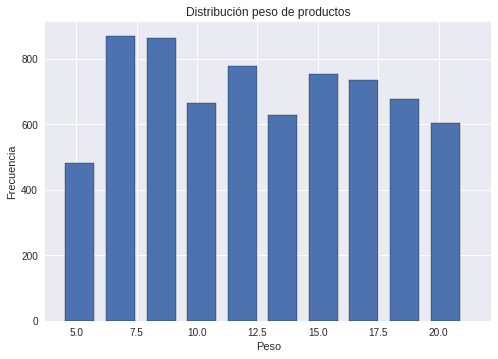

In [49]:
df["Item_Weight"].hist(width=1.2, edgecolor='black')
plt.style.use('seaborn')
plt.title("Distribución peso de productos")
plt.xlabel("Peso")
plt.ylabel("Frecuencia")

<ipython-input-50-ddcf6fa11e2c>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Text(0, 0.5, 'Frecuencia')

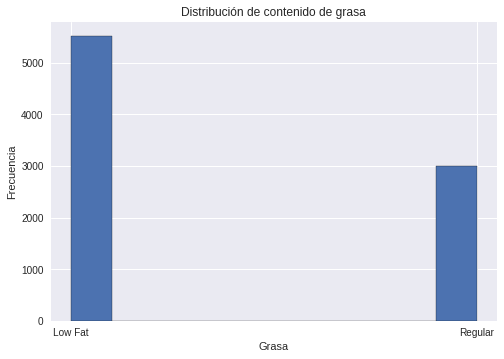

In [50]:
df["Item_Fat_Content"].hist(edgecolor='black')
plt.style.use('seaborn')
plt.title("Distribución de contenido de grasa")
plt.xlabel("Grasa")
plt.ylabel("Frecuencia")

<ipython-input-51-7d244a058d8b>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


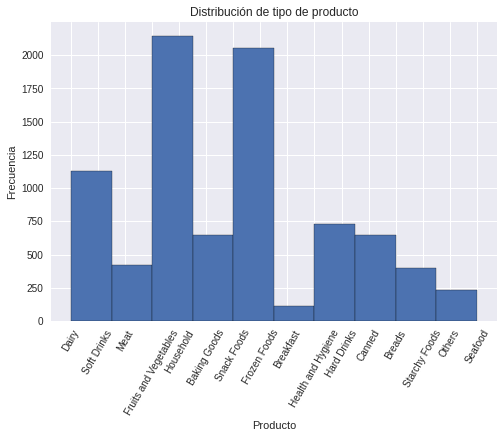

In [51]:
df["Item_Type"].hist(edgecolor='black')
plt.style.use('seaborn')
plt.title("Distribución de tipo de producto")
plt.xlabel("Producto")
plt.ylabel("Frecuencia")
plt.tick_params(axis='x', rotation=60)

<ipython-input-52-2f685b3fa3c7>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


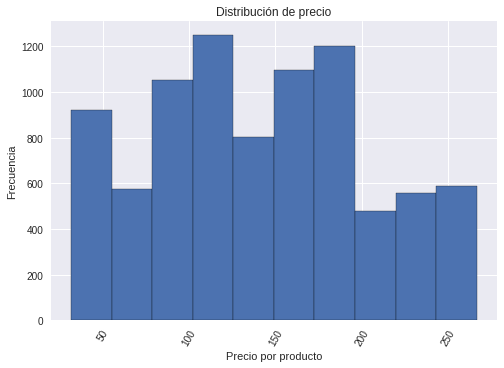

In [52]:
df["Item_MRP"].hist(edgecolor='black')
plt.style.use('seaborn')
plt.title("Distribución de precio")
plt.xlabel("Precio por producto")
plt.ylabel("Frecuencia")
plt.tick_params(axis='x', rotation=60)

<ipython-input-53-5a5a276bddef>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


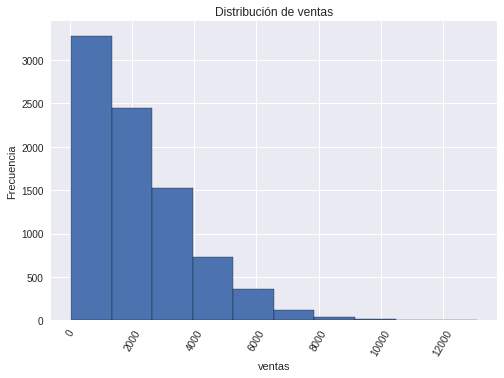

In [53]:
df["Item_Outlet_Sales"].hist(edgecolor='black')
plt.style.use('seaborn')
plt.title("Distribución de ventas")
plt.xlabel("ventas")
plt.ylabel("Frecuencia")
plt.tick_params(axis='x', rotation=60)

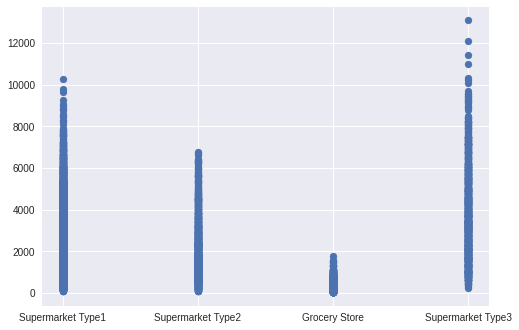

In [54]:
plt.scatter(df["Outlet_Type"], df["Item_Outlet_Sales"])

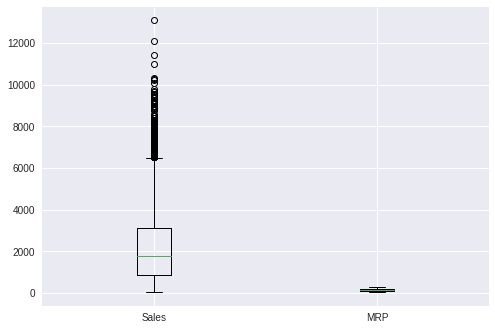

In [55]:
plt.boxplot([df["Item_Outlet_Sales"],df["Item_MRP"]], labels=['Sales','MRP']);

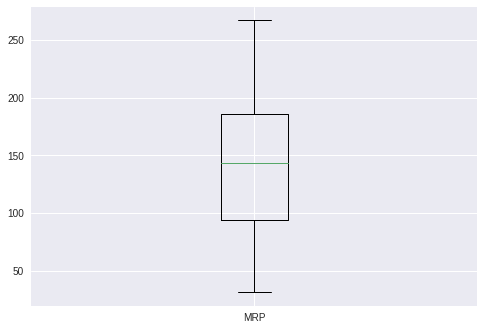

In [56]:
plt.boxplot([df["Item_MRP"]], labels=['MRP'])
plt.show()

Parte 5

In [57]:
# El objetivo que intentamos predecir.
y = df['Item_Outlet_Sales']
# Las características que se usarán para hacer la predicción
X = df.drop(columns = 'Item_Outlet_Sales')

#2)
from sklearn.model_selection import train_test_split
# Train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [58]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

6392
6392
2131
2131


In [59]:
# Selectores a nuestros tipos de datos numéricos y categóricos
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')

# Seleccion las columnas numéricas de cada tipo
num_columns = num_selector(X_train)
cat_columns = cat_selector(X_train)

# Comprobacion de las listas
print('Columnas numericas:', num_columns)
print('Columnas categoricas:', cat_columns)


Columnas numericas: ['Item_Weight', 'Item_Visibility', 'Item_MRP']
Columnas categoricas: ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [60]:
# Aislar las columnas numéricas
df_num = df[num_columns]
# Ailsar las columnas con datos faltantes
df_num.loc[:, df_num.isna().any()]

,Item_Weight
0,9.300
1,5.920
2,17.500
3,19.200
4,8.930
...,...
8518,6.865
8519,8.380
8520,10.600
8521,7.210


In [61]:
#Simple Imputer Numericos
median_imputer = SimpleImputer(strategy='mean')

median_imputer.fit(X_train[num_columns])

X_train.loc[:, num_columns] = median_imputer.transform(X_train[num_columns])
X_test.loc[:, num_columns] = median_imputer.transform(X_test[num_columns])

In [62]:
#Simple Imputer Categoricos
Frequent_imputer = SimpleImputer(strategy='most_frequent')

Frequent_imputer.fit(X_train[cat_columns])

X_train.loc[:, cat_columns] = Frequent_imputer.transform(X_train[cat_columns])
X_test.loc[:, cat_columns] = Frequent_imputer.transform(X_test[cat_columns])

In [63]:
X_train.isna().any()

Item_Identifier         False
Item_Weight             False
Item_Fat_Content        False
Item_Visibility         False
Item_Type               False
Item_MRP                False
Outlet_Identifier       False
Outlet_Size             False
Outlet_Location_Type    False
Outlet_Type             False
dtype: bool

In [64]:
X_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
4776,NCG06,16.350,Low Fat,0.029565,Household,256.4646,OUT018,Medium,Tier 3,Supermarket Type2
7510,FDV57,15.250,Regular,0.000000,Snack Foods,179.7660,OUT018,Medium,Tier 3,Supermarket Type2
5828,FDM27,12.350,Regular,0.158716,Meat,157.2946,OUT049,Medium,Tier 1,Supermarket Type1
5327,FDG24,7.975,Low Fat,0.014628,Baking Goods,82.3250,OUT035,Small,Tier 2,Supermarket Type1
4810,FDD05,19.350,Low Fat,0.016645,Frozen Foods,120.9098,OUT045,Medium,Tier 2,Supermarket Type1


In [66]:
X_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
7503,FDI28,14.300000,Low Fat,0.026300,Frozen Foods,79.4302,OUT013,High,Tier 3,Supermarket Type1
2957,NCM17,7.930000,Low Fat,0.071136,Health and Hygiene,42.7086,OUT046,Small,Tier 1,Supermarket Type1
7031,FDC14,14.500000,Regular,0.041313,Canned,42.0454,OUT049,Medium,Tier 1,Supermarket Type1
1084,DRC36,12.904458,Regular,0.044767,Soft Drinks,173.7054,OUT027,Medium,Tier 3,Supermarket Type3
856,FDS27,10.195000,Regular,0.012456,Meat,197.5110,OUT035,Small,Tier 2,Supermarket Type1
